# Fellowship dataset EDA

In [239]:
%matplotlib inline

import pandas as pd
import numpy as np
import re
import math
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
import seaborn as sns

In [240]:
# read the csv file and store it as a pandas dataframe in fellowship_df
fellowship_df = pd.read_csv("../datasets/fellowship_data.csv")

In [241]:
fellowship_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  32 non-null     int64  
 1   Date      31 non-null     object 
 2   Pulse     32 non-null     int64  
 3   Maxpulse  32 non-null     int64  
 4   Calories  30 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.4+ KB


In [242]:
fellowship_df

,Duration,Date,Pulse,Maxpulse,Calories
0,60,'2020/12/01',110,130,409.1
1,60,'2020/12/02',117,145,479.0
2,60,'2020/12/03',103,135,340.0
3,45,'2020/12/04',109,175,282.4
4,45,'2020/12/05',117,148,406.0
5,60,'2020/12/06',102,127,300.0
6,60,'2020/12/07',110,136,374.0
7,450,'2020/12/08',104,134,253.3
8,30,'2020/12/09',109,133,195.1
9,60,'2020/12/10',98,124,269.0


### Convert data column to date time, but first convert it all to the same string format

In [243]:
fellowship_df['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 32 entries, 0 to 31
Series name: Date
Non-Null Count  Dtype 
--------------  ----- 
31 non-null     object
dtypes: object(1)
memory usage: 384.0+ bytes


In [244]:
def convert_date_format(string):
    # Check if string is NaN
    if pd.isna(string):
        return string
    
    # Define regex pattern to check if string matches the 'YYYY/MM/DD' format
    pattern = r"'\d{4}/\d{2}/\d{2}'"
    
    # Check if string matches the pattern:
    if re.match(pattern, string):
        # String is already in 'YYYY/MM/DD' format, so return it
        return string
    else:
        # Convert string to 'YYYY-MM-DD' format
        string = str(string)
        return "'" + string[:4] + '/' + string[4:6] + '/' + string[6:] + "'"

# Apply the function to the 'Date' column of the DataFrame
fellowship_df['Date'] = fellowship_df['Date'].apply(convert_date_format)


In [245]:
fellowship_df

,Duration,Date,Pulse,Maxpulse,Calories
0,60,'2020/12/01',110,130,409.1
1,60,'2020/12/02',117,145,479.0
2,60,'2020/12/03',103,135,340.0
3,45,'2020/12/04',109,175,282.4
4,45,'2020/12/05',117,148,406.0
5,60,'2020/12/06',102,127,300.0
6,60,'2020/12/07',110,136,374.0
7,450,'2020/12/08',104,134,253.3
8,30,'2020/12/09',109,133,195.1
9,60,'2020/12/10',98,124,269.0


#### All the dates in the date column are now in the same format

In [246]:
# convert values in Date column to datetime object
fellowship_df['Date'] = pd.to_datetime(fellowship_df['Date'])

In [247]:
fellowship_df

,Duration,Date,Pulse,Maxpulse,Calories
0,60,2020-12-01,110,130,409.1
1,60,2020-12-02,117,145,479.0
2,60,2020-12-03,103,135,340.0
3,45,2020-12-04,109,175,282.4
4,45,2020-12-05,117,148,406.0
5,60,2020-12-06,102,127,300.0
6,60,2020-12-07,110,136,374.0
7,450,2020-12-08,104,134,253.3
8,30,2020-12-09,109,133,195.1
9,60,2020-12-10,98,124,269.0


In [248]:
#find if there are any duplicates
if fellowship_df.duplicated().any():
    print("There are duplicate rows in the DataFrame.")
else:
    print("There are no duplicate rows in the DataFrame.")

There are duplicate rows in the DataFrame.


In [249]:
# drop the duplicated value on row 12
# fellowship_df_no_duplicated = 
fellowship_df.drop_duplicates(inplace = True)

In [250]:
fellowship_df_no_duplicated

,Duration,Date,Pulse,Maxpulse,Calories
0,60,2020-12-01,110,130,409.1
1,60,2020-12-02,117,145,479.0
2,60,2020-12-03,103,135,340.0
3,45,2020-12-04,109,175,282.4
4,45,2020-12-05,117,148,406.0
5,60,2020-12-06,102,127,300.0
6,60,2020-12-07,110,136,374.0
7,450,2020-12-08,104,134,253.3
8,30,2020-12-09,109,133,195.1
9,60,2020-12-10,98,124,269.0


In [251]:
# hence row 12 has been dropped, but the index has not reset
fellowship_df_no_duplicated.reset_index(drop=True, inplace=True)

In [252]:
#check if index has been reset
fellowship_df_no_duplicated

,Duration,Date,Pulse,Maxpulse,Calories
0,60,2020-12-01,110,130,409.1
1,60,2020-12-02,117,145,479.0
2,60,2020-12-03,103,135,340.0
3,45,2020-12-04,109,175,282.4
4,45,2020-12-05,117,148,406.0
5,60,2020-12-06,102,127,300.0
6,60,2020-12-07,110,136,374.0
7,450,2020-12-08,104,134,253.3
8,30,2020-12-09,109,133,195.1
9,60,2020-12-10,98,124,269.0


## Replace anamolous values and NaN

### Replace NaT in date column by increasing the date of the previous day by 1

In [253]:
# Add one day to the last valid date to generate the new date
new_date = fellowship_df_no_duplicated['Date'].fillna(method='ffill') + pd.Timedelta(days=1)

# Fill NaT values with the new date
fellowship_df_no_duplicated.loc[:, 'Date'] = fellowship_df_no_duplicated['Date'].fillna(new_date)

In [256]:
fellowship_df_no_duplicated

,Duration,Date,Pulse,Maxpulse,Calories
0,60,2020-12-01,110,130,409.1
1,60,2020-12-02,117,145,479.0
2,60,2020-12-03,103,135,340.0
3,45,2020-12-04,109,175,282.4
4,45,2020-12-05,117,148,406.0
5,60,2020-12-06,102,127,300.0
6,60,2020-12-07,110,136,374.0
7,450,2020-12-08,104,134,253.3
8,30,2020-12-09,109,133,195.1
9,60,2020-12-10,98,124,269.0


### Replacing NaN in the 'Calories' column

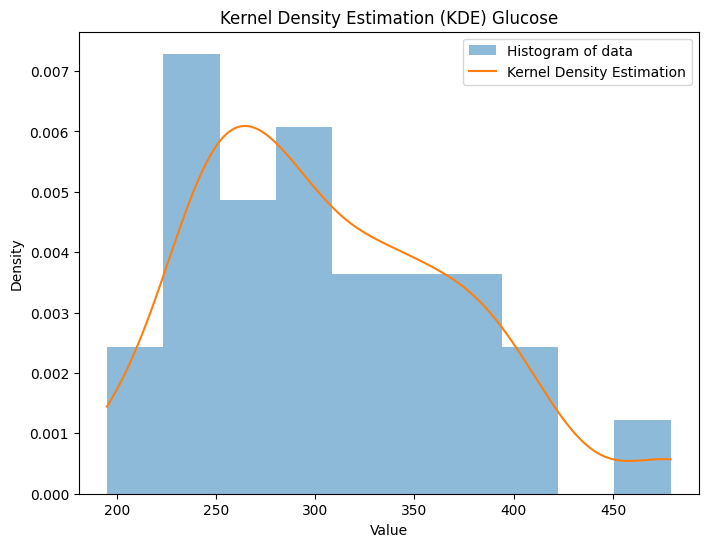

In [255]:
df_with_no_nan_cal = fellowship_df_no_duplicated['Calories'].dropna()
check_distribution = df_with_no_nan_cal
kde = KernelDensity(bandwidth= 25, kernel='gaussian')
check_numpy = np.array(check_distribution)
kde.fit(check_numpy[:, np.newaxis]) 

# Generate points for plotting the KDE
x_plot = np.linspace(min(check_distribution), max(check_distribution), 1000)
log_dens = kde.score_samples(x_plot[:, np.newaxis])

# Plot the data and the KDE
plt.figure(figsize=(8, 6))
plt.hist(check_distribution, bins=10, density=True, alpha=0.5, label='Histogram of data')
plt.plot(x_plot, np.exp(log_dens), label='Kernel Density Estimation')
plt.title('Kernel Density Estimation (KDE) Glucose')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

#### The 'Calories' column in the dataset is positively skewed, so we replace the NaN values of the 'Calories' column with the median of the column

In [257]:
calorie_median = fellowship_df_no_duplicated['Calories'].median()
fellowship_df_no_duplicated.loc[:, 'Calories'].fillna(calorie_median, inplace = True)

C:\Users\prash\AppData\Local\Temp\ipykernel_25012\3179491159.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fellowship_df_no_duplicated.loc[:, 'Calories'].fillna(calorie_median, inplace = True)


In [258]:
fellowship_df_no_duplicated

,Duration,Date,Pulse,Maxpulse,Calories
0,60,2020-12-01,110,130,409.1
1,60,2020-12-02,117,145,479.0
2,60,2020-12-03,103,135,340.0
3,45,2020-12-04,109,175,282.4
4,45,2020-12-05,117,148,406.0
5,60,2020-12-06,102,127,300.0
6,60,2020-12-07,110,136,374.0
7,450,2020-12-08,104,134,253.3
8,30,2020-12-09,109,133,195.1
9,60,2020-12-10,98,124,269.0


### Replace anamolous data in 'Duration' column with the mode

In [259]:
fellowship_df_no_duplicated.loc[fellowship_df_no_duplicated['Duration'] > 60, 'Duration'] = fellowship_df_no_duplicated['Duration'].mode()[0]

In [260]:
fellowship_df_no_duplicated['Duration'].mode()[0]

60

In [261]:
fellowship_df_no_duplicated

,Duration,Date,Pulse,Maxpulse,Calories
0,60,2020-12-01,110,130,409.1
1,60,2020-12-02,117,145,479.0
2,60,2020-12-03,103,135,340.0
3,45,2020-12-04,109,175,282.4
4,45,2020-12-05,117,148,406.0
5,60,2020-12-06,102,127,300.0
6,60,2020-12-07,110,136,374.0
7,60,2020-12-08,104,134,253.3
8,30,2020-12-09,109,133,195.1
9,60,2020-12-10,98,124,269.0


### Create a column that calculates difference between max pulse and min pulse

In [263]:
fellowship_df_no_duplicated.loc[:, 'MaxPulseDifference'] = fellowship_df_no_duplicated['Maxpulse'] - fellowship_df_no_duplicated['Pulse']

In [264]:
#check
fellowship_df_no_duplicated

,Duration,Date,Pulse,Maxpulse,Calories,MaxPulseDifference
0,60,2020-12-01,110,130,409.1,20
1,60,2020-12-02,117,145,479.0,28
2,60,2020-12-03,103,135,340.0,32
3,45,2020-12-04,109,175,282.4,66
4,45,2020-12-05,117,148,406.0,31
5,60,2020-12-06,102,127,300.0,25
6,60,2020-12-07,110,136,374.0,26
7,60,2020-12-08,104,134,253.3,30
8,30,2020-12-09,109,133,195.1,24
9,60,2020-12-10,98,124,269.0,26


### Calculate calories burned per second

In [266]:
fellowship_df_no_duplicated.loc[:, 'CaloriesBurnedPerSecond'] = fellowship_df_no_duplicated['Calories'] / (fellowship_df_no_duplicated['Duration'] * 60)

### Sort values by calories

In [280]:
fellowship_df_no_duplicated.sort_values(by = 'Calories', ascending = False, inplace = True)

C:\Users\prash\AppData\Local\Temp\ipykernel_25012\1441915858.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fellowship_df_no_duplicated.sort_values(by = 'Calories', ascending = False, inplace = True)


In [282]:
# check
fellowship_df_no_duplicated

,Duration,Date,Pulse,Maxpulse,Calories,MaxPulseDifference,CaloriesBurnedPerSecond
1,60,2020-12-02,117,145,479.0,28,0.133056
0,60,2020-12-01,110,130,409.1,20,0.113639
4,45,2020-12-05,117,148,406.0,31,0.150370
29,60,2020-12-30,102,129,380.3,27,0.105639
13,60,2020-12-14,104,132,379.3,28,0.105361
6,60,2020-12-07,110,136,374.0,26,0.103889
20,60,2020-12-21,108,131,364.2,23,0.101167
12,60,2020-12-13,106,128,345.3,22,0.095917
2,60,2020-12-03,103,135,340.0,32,0.094444
24,60,2020-12-25,102,126,334.5,24,0.092917


### Retrieve a subset of the dataframes where calories are higher than 400, less than 200 and between 200-300.

In [283]:
df_subset_more_400 = fellowship_df_no_duplicated[fellowship_df_no_duplicated['Calories'] > 400]
df_subset_less_200 = fellowship_df_no_duplicated[fellowship_df_no_duplicated['Calories'] < 200]
df_subset_between_200_300 = fellowship_df_no_duplicated[(fellowship_df_no_duplicated['Calories'] >= 200) & (fellowship_df_no_duplicated['Calories'] <= 300)]

In [284]:
df_subset_between_200_300

,Duration,Date,Pulse,Maxpulse,Calories,MaxPulseDifference,CaloriesBurnedPerSecond
22,60,2020-12-23,130,101,300.0,-29,0.083333
17,45,2020-12-18,90,112,300.0,22,0.111111
16,60,2020-12-17,100,120,300.0,20,0.083333
5,60,2020-12-06,102,127,300.0,25,0.083333
27,60,2020-12-28,103,132,300.0,29,0.083333
3,45,2020-12-04,109,175,282.4,66,0.104593
21,45,2020-12-22,100,119,282.0,19,0.104444
28,60,2020-12-29,100,132,280.0,32,0.077778
14,60,2020-12-15,98,123,275.0,25,0.076389
9,60,2020-12-10,98,124,269.0,26,0.074722


In [285]:
df_subset_less_200

,Duration,Date,Pulse,Maxpulse,Calories,MaxPulseDifference,CaloriesBurnedPerSecond
8,30,2020-12-09,109,133,195.1,24,0.108389


In [286]:
df_subset_more_400

,Duration,Date,Pulse,Maxpulse,Calories,MaxPulseDifference,CaloriesBurnedPerSecond
1,60,2020-12-02,117,145,479.0,28,0.133056
0,60,2020-12-01,110,130,409.1,20,0.113639
4,45,2020-12-05,117,148,406.0,31,0.150370


### Find unique values in 'Duration' column

In [287]:
fellowship_df_no_duplicated['Duration'].unique()

array([60, 45, 30], dtype=int64)

### Count how many missing values

In [289]:
fellowship_df.isna().sum()

Duration    0
Date        1
Pulse       0
Maxpulse    0
Calories    2
dtype: int64